In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gc

In [2]:
# user_df = pd.read_csv("../data/prod/users/user_dfs_dirty/user_data.csv", sep="\t", low_memory=False)
user_df = pd.read_pickle("../data/prod/users/user_dfs_dirty/user_data.pkl")
# games_df = pd.read_csv("../data/prod/games/game_dfs_clean/games_clean.csv", sep="\t", low_memory=False)

In [3]:
len(user_df['rating'].unique())

13141

In [4]:
user_df['rating'] = round(user_df['rating'], 1)
len(user_df['rating'].unique())

94

In [5]:
user_ratings_count_df = user_df.groupby('username').count()['rating']
user_names_less_than_5 = user_ratings_count_df[user_ratings_count_df < 5].index
user_df = user_df.drop(user_df[user_df['username'].isin(user_names_less_than_5)].index)

In [6]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25655928 entries, 2 to 25996450
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   username  object 
 1   BGGId     int64  
 2   rating    float64
 3   value     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 978.7+ MB


In [7]:
user_df.describe()

,BGGId,rating
count,2.565593e+07,2.565593e+07
mean,1.416023e+05,7.127076e+00
std,1.121992e+05,1.558745e+00
min,1.000000e+00,0.000000e+00
25%,2.773900e+04,6.000000e+00
50%,1.465080e+05,7.000000e+00
75%,2.286870e+05,8.000000e+00
max,4.296530e+05,1.000000e+01


In [8]:
unique_users = list(user_df['username'].unique())
len(unique_users)

350990

<Axes: >

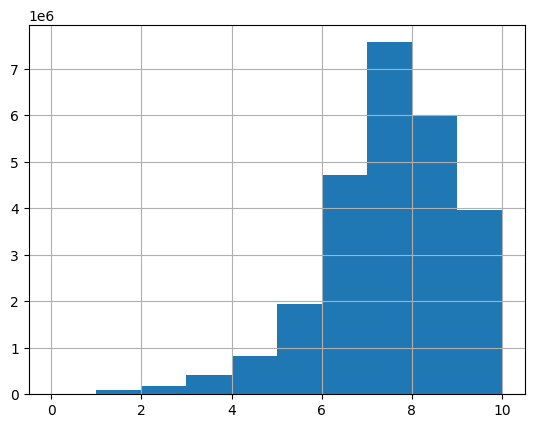

In [9]:
user_df['rating'].hist()

In [10]:
Q1 = user_df['rating'].quantile(0.25)
Q3 = user_df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - .75 * IQR
upper_bound = Q3 + .75 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

(np.float64(6.0),
 np.float64(8.0),
 np.float64(2.0),
 np.float64(4.5),
 np.float64(9.5))

In [11]:
# # Group by username and evaluate criteria
# user_criteria = user_df.groupby('username')['rating'].agg(
#     all_above_upper=lambda x: (x > upper_bound).all(),
#     all_below_lower=lambda x: (x < lower_bound).all(),
#     all_outside_bounds=lambda x: ((x > upper_bound) | (x < lower_bound)).all()
# )

In [12]:
# # Identify users to exclude
# users_to_exclude = user_criteria.query("all_above_upper or all_below_lower or all_outside_bounds").index
# users_to_exclude

In [13]:
# # Filter out these users
# filtered_df = user_df[~user_df['username'].isin(users_to_exclude)]

# filtered_df.head()

In [14]:
# excluded_df = user_df[user_df['username'].isin(users_to_exclude)]

# excluded_df.head()

In [15]:
# len(excluded_df)

In [16]:
user_df[user_df['username'] == 'Threnody'].head()

,username,BGGId,rating,value
12043050,Threnody,555,7.0,NaN
12043051,Threnody,891,6.0,The is obviously a party game. With two peopl...
12043052,Threnody,278,6.0,"I LOVE this game, but for some reason my husba..."
12043053,Threnody,281259,8.0,NaN
12043054,Threnody,201808,7.0,NaN


In [17]:
user_df.to_pickle("../data/prod/users/user_dfs_clean/user_data.pkl")

In [18]:
user_df.to_csv("../data/prod/users/user_dfs_clean/user_data.csv", sep="\t", index=False)